# DISCOV-Gracilaria Paper

Simon Oiry¹ [](https://orcid.org/0000-0001-7161-5246) (, Institut des Substances et Organismes de la Mer, ISOMer, , , )  
Bede Ffinian Rowe Davies¹ [](https://orcid.org/0000-0001-6462-4347) ()  
Pierre Gernez¹ [](https://orcid.org/0000-0003-2055-410X) ()  
Laurent Barillé¹ [](https://orcid.org/0000-0001-5138-2684) ()  
November 20, 2024

To be Written

[1]

[1] Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France

In [ ]:
library(tidyverse)
library(terra)
library(rnaturalearth) 
library(rnaturalearthdata) 
library(sf)
library(Utilities.Package)
library(ggrepel)

In [ ]:
my_comma<-scales::label_comma(accuracy = NULL, big.mark = ",",decimal.mark = ".")

# Introduction

Coastal ecosystems are among the most dynamic and productive environments on Earth, providing ecosystem services and supporting biodiversity \[@unsworth2022planetary ; @barbier2011value ; @watanabe2018introduction\]. These ecosystems, spanning mangroves, salt marshes, seagrass meadows, and rocky intertidal zones, play a pivotal role in carbon sequestration, nutrient cycling, and shoreline stabilization \[@liquete2013current ; @mehvar2018quantifying\]. They also serve as habitats for numerous species, many of which are commercially or ecologically significant \[@seitz2014ecological ; @de2023valuing\]. Coastal areas are densely populated, with billions of people globally depending on their resources for livelihoods, fisheries, and tourism \[@mukherjee2023coastal ; @small2003global\]. However, coastal ecosystems face mounting pressures from human activities such as land reclamation, pollution, and overfishing, compounded by the impacts of climate change \[@lu2018major ; @hall2019ocean\]. Sea level rise, ocean acidification, and increasing storm intensity further exacerbate the vulnerability of these systems, threatening their resilience and the services they provide \[@he2019climate\].

One of the significant threats to coastal ecosystems is biological invasions by non-native species, which can disrupt native biodiversity and alter ecosystem functions \[@krueger2018everywhere ; @capdevila2019warming ;@liu2020ocean\]. *Gracilaria vermiculophylla*, an invasive red macroalga native to the northwest Pacific, exemplifies this issue. Over the last century, this species has spread extensively across temperate estuaries in North America, Europe, and other regions, facilitated by aquaculture and maritime activities \[@rueness2005life ; @weinberger2008invasive ; @krueger2017genetic\]. Its success as an invader stems from its tolerance to a wide range of environmental stressors, including temperature \[@sotka2018combining\], salinity \[@weinberger2008invasive\], and nutrient variability \[@abreu2011nitrogen\], as well as its ability to establish in soft sediment habitats traditionally devoid of macroalgae \[@ramus2017invasive\]. While *G. vermiculophylla* can provide some ecosystem services, such as habitat for invertebrates and juvenile fish, it often outcompetes native vegetation, alters sediment composition \[@nyberg2009flora\], and disrupts trophic interactions \[@van2018global\]. In regions like the Baltic Sea and the eastern United States, it has been documented to negatively affect native fucoids and seagrasses \[@van2003reintroduction ; @thomsen2013effects\]. These impacts underscore the importance of monitoring and managing the spread of *G. vermiculophylla*, particularly as climate change and anthropogenic pressures continue to facilitate biological invasions.

Remote sensing has revolutionized our ability to monitor and manage ecosystems, offering efficient and scalable methods for detecting environmental changes over large areas \[@davies2024intertidal ; @davies2024sentinel ; @zoffoli2021decadal\]. Among these technologies, drone-based remote sensing has emerged as a particularly promising tool for studying coastal environments \[@roman2023mapping ; @roman2024mapping\]. Equipped with high-resolution cameras and multispectral or hyperspectral sensors, drones can capture fine-scale spatial and spectral data, enabling researchers to identify and map vegetation, detect stress in plants, and monitor changes over time \[@roman2021using ; Oiry et al. 2024\]. Unlike traditional satellite imagery, drones provide the flexibility to operate in overcast conditions, achieve higher spatial resolution, and target specific areas of interest. For invasive species like *G. vermiculophylla*, drones equipped with multispectral sensors can differentiate it from native vegetation based on its unique spectral reflectance characteristics (Davies et al. 2025). This capability not only enhances detection accuracy but also reduces the time and labor associated with traditional field surveys. As the cost of drone technology continues to decrease and advancements in machine learning facilitate data analysis, drone-based remote sensing is becoming increasingly accessible and impactful for ecological research and management.

In this study, we aim to harness the potential of drone-based multispectral remote sensing to map *Gracilaria vermiculophylla* in intertidal zones. Bla bla what are we going to do ? bla bla .

# Materiel & Methods

## Study sites

Field campaigns were conducted at three study sites in France and Spain. At each site, two locations were investigated \[@fig-location_sites\]. The Aven & Belon Estuary in South Brittany, France (@fig-location_sites A), is a dynamic ria-type system hosting diverse habitats, including sandy tidal flats and subtidal zones with coarse, marine-origin sediments \[@Michel2021 ; @Castaing1995\]. These habitats support key benthic species such as *Scrobicularia plana*, *Cerastoderma edule*, and *Tellina tenuis*, which play essential roles in sediment bioturbation and nutrient cycling \[@Tankoua2011 ; @Blanchet2014\]. The estuary serves as a nursery for juvenile fish and a feeding ground for migratory birds, with its ecological productivity driven by a mix of euryhaline and marine species adapted to salinity gradients \[@Blanchet2014\]. Oyster farming, particularly *Crassostrea gigas*, is a dominant activity, altering sediment dynamics and local biodiversity \[@Michel2021\]. Despite its ecological richness, the estuary faces pressures from nutrient loading and physical alterations, with bioindicators like *S. plana* used to monitor the impacts of salinity, sediment quality, and pollution \[@Tankoua2011\].

The Ria d’Étel, located in Brittany, France, is a macrotidal estuary characterized by its unique hydrodynamics and biodiversity (@fig-location_sites B). Influenced predominantly by tidal regimes, the estuary exhibits high-energy zones with strong currents reaching up to 2.5 m/s, shaping both sediment deposition and ecological habitats \[@Portas2023\]. The estuary supports diverse benthic communities, with sedimentary organic matter originating from both terrestrial inputs and marine sources, contributing to nutrient cycling and benthic fluxes \[@Jeanneau2023\]. Vegetation gradients transition from halophytic plants in saline zones to freshwater species upstream, reflecting the estuary’s salinity dynamics and ecological complexity \[@Cianfaglione2018\]. This estuary is also notable for its shellfish farming, with species like *Crassostrea gigas* cultivated extensively. The presence of filter-feeding organisms such as sponges (*Hymeniacidon perlevis*) enhances water quality by mitigating bacterial loads and promoting bioremediation \[@Gentric2024\]. However, the estuary faces environmental pressures, including nutrient enrichment from agricultural runoff and anthropogenic impacts on sedimentary processes.

The Saja-Besaya Estuary, situated along the Cantabrian Sea in northern Spain, is characterized by the confluence of the Saja and Besaya rivers near Torrelavega (@fig-location_sites C). The estuary, also known as San Martín de la Arena or Suances Estuary, has been subject to significant anthropogenic pressures, including industrial developments throughout the 20th century. These activities have led to contamination from mining, paper manufacturing, and carbonate discharges, classifying the estuary as highly polluted near its upper reaches \[@ortega2005fluxes\]. This contamination impacts the estuarine ecosystem, including water quality and biodiversity, with minimal aquatic life and sparse riverbank vegetation in its lower sections \[@romero2008sintering\].

In [ ]:
######### Aven Belon 

mask_aven_belon <- read_sf("Data/shp/mask/mask_site_Aven_Belon_32630.shp")

HT <-  list.files("Data/Sentinel2/Aven_Belon/S2A_MSIL2A_20231107T111251_N0509_R137_T30TVT_20231107T144858.SAFE/GRANULE/L2A_T30TVT_A043749_20231107T111246/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_HT <- rast(HT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_aven_belon, mask = T) 
B8_HT <- B8_HT - 1000

B4_HT <- rast(HT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_aven_belon, mask = T)
B4_HT <- B4_HT -1000

NDVI_HT <- (B8_HT-B4_HT)/(B8_HT+B4_HT)


LT <-  list.files("Data/Sentinel2/Aven_Belon/S2A_MSIL2A_20240624T110641_N0510_R137_T30TVT_20240624T153247.SAFE/GRANULE/L2A_T30TVT_A047038_20240624T111001/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_LT <- rast(LT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_aven_belon, mask = T) 
B8_LT <- B8_LT - 1000

B4_LT <- rast(LT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_aven_belon, mask = T)
B4_LT <- B4_LT -1000

NDVI_LT <- (B8_LT-B4_LT)/(B8_LT+B4_LT)


intertidal_Aven_Belon <- NDVI_LT > 0.05 & NDVI_HT < -0.05


values(intertidal_Aven_Belon)[values(intertidal_Aven_Belon) == F] <- NA

mask_sf <- as.polygons(intertidal_Aven_Belon) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() %>% 
  smoothr::smooth(method = "ksmooth", smoothness = 3)
  
# plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_intertidal_Aven_Belon.shp")


Land_Aven_Belon <- NDVI_LT > 0.05 & NDVI_HT > 0.05


values(Land_Aven_Belon)[values(Land_Aven_Belon) == F] <- NA

mask_sf <- as.polygons(Land_Aven_Belon) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes()
  # smoothr::smooth(method = "ksmooth", smoothness = 3)
  
# plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_Land_Aven_Belon.shp")



######### ETEL

mask_Etel <- read_sf("Data/shp/mask/mask_site_Etel_32630.shp")

HT <-  list.files("Data/Sentinel2/Etel/S2A_MSIL2A_20231008T110941_N0509_R137_T30TVT_20231008T171550.SAFE/GRANULE/L2A_T30TVT_A043320_20231008T111641/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_HT <- rast(HT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_Etel, mask = T) 
B8_HT <- B8_HT - 1000

B4_HT <- rast(HT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_Etel, mask = T)
B4_HT <- B4_HT -1000

NDVI_HT <- (B8_HT-B4_HT)/(B8_HT+B4_HT)

LT <-  list.files("Data/Sentinel2/Etel/S2B_MSIL2A_20230718T112119_N0509_R037_T30TVT_20230718T124824.SAFE/GRANULE/L2A_T30TVT_A033239_20230718T112118/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_LT <- rast(LT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_Etel, mask = T) 
B8_LT <- B8_LT - 1000

B4_LT <- rast(LT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_Etel, mask = T)
B4_LT <- B4_LT -1000

NDVI_LT <- (B8_LT-B4_LT)/(B8_LT+B4_LT)


intertidal_Etel <- NDVI_LT > 0.05 & NDVI_HT < -0.05


values(intertidal_Etel)[values(intertidal_Etel) == F] <- NA

mask_sf <- as.polygons(intertidal_Etel) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() %>% 
  smoothr::smooth(method = "ksmooth", smoothness = 3)
  
# plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_intertidal_Etel.shp")


Land_Etel <- NDVI_LT > 0.05 & NDVI_HT > 0.05


values(Land_Etel)[values(Land_Etel) == F] <- NA

mask_sf <- as.polygons(Land_Etel) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() 
  
plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_Land_Etel.shp")

######### SAJA

mask_SAJA <- read_sf("Data/shp/mask/mask_site_Saja_32630.shp")


HT <-  list.files("Data/Sentinel2/Saja/S2A_MSIL2A_20181004T110911_N0500_R137_T30TVP_20230620T014212.SAFE/GRANULE/L2A_T30TVP_A017151_20181004T111207/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_HT <- rast(HT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_SAJA, mask = T) 
B8_HT <- B8_HT - 1000

B4_HT <- rast(HT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_SAJA, mask = T)
B4_HT <- B4_HT -1000

NDVI_HT <- (B8_HT-B4_HT)/(B8_HT+B4_HT)


LT <-  list.files("Data/Sentinel2/Saja/S2A_MSIL2A_20230928T110831_N0509_R137_T30TVP_20230928T171657.SAFE/GRANULE/L2A_T30TVP_A043177_20230928T111532/IMG_DATA/R10m/", pattern = ".jp2",recursive =T,full.names = T)

B8_LT <- rast(LT[5]) %>% 
  `names<-`("B08") %>% 
  crop(mask_SAJA, mask = T) 
B8_LT <- B8_LT - 1000

B4_LT <- rast(LT[4])%>% 
  `names<-`("B04") %>% 
  crop(mask_SAJA, mask = T)
B4_LT <- B4_LT -1000

NDVI_LT <- (B8_LT-B4_LT)/(B8_LT+B4_LT)


intertidal_Saja <- NDVI_LT > 0.05 & NDVI_HT < -0.05


values(intertidal_Saja)[values(intertidal_Saja) == F] <- NA

mask_sf <- as.polygons(intertidal_Saja) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() %>% 
  smoothr::smooth(method = "ksmooth", smoothness = 3)
  
# plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_intertidal_Saja.shp")


Land_Saja <- NDVI_LT > 0.05 & NDVI_HT > 0.05

values(Land_Saja)[values(Land_Saja) == F] <- NA

mask_sf <- as.polygons(Land_Saja) %>% 
  st_as_sf() %>% 
  st_cast("POLYGON") %>% 
  mutate(area = st_area(geometry)) %>% 
  dplyr::filter(as.numeric(area) > 6500) %>% 
  nngeo::st_remove_holes() %>% 
  smoothr::smooth(method = "ksmooth", smoothness = 3)
  
plot(mask_sf)

write_sf(mask_sf,"Data/shp/Intertidal_sites/mask_Land_Saja.shp")

In [ ]:
sovereignty10 <- ne_countries(scale = 10, returnclass = "sf")

world_map <- sovereignty10 %>% 
  st_as_sf() %>% 
  dplyr::filter(sovereignt%in%c("Spain","France","Portugal",
                                "Italy","Andorra",
                                "United Kingdom",
                                "Switzerland","Belgium",
                                "Germany","Luxembourg") ) 

bbox_europe <- st_bbox(c(xmin = -20, ymin = 34,
                         xmax = 20, ymax = 55) ,
                       crs = st_crs(world_map) ) 

world_map<-st_make_valid(world_map) 

european_union_map_cropped <- st_crop(world_map, bbox_europe)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  


UnitedKingdom<-sovereignty10 %>% 
  st_as_sf() %>% 
  dplyr::filter(sovereignt%in%c("United Kingdom") ) %>% 
  st_cast("POLYGON") 

bbox_UK <- st_bbox(c(xmin = -20, ymin = 45,
                         xmax = 20, ymax = 55) ,
                       crs = st_crs(UnitedKingdom) ) 

UnitedKingdom<-st_make_valid(UnitedKingdom) 

UK_map_cropped <- st_crop(UnitedKingdom, bbox_UK)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ") 

Europe_sf<-european_union_map_cropped %>% 
  dplyr::bind_rows(UK_map_cropped) 


Projects<-data.frame(
  Name=c(
  "France -Ria d'Etel",
  "France - Aven & Belon",
  "Spain - Saja Estuary"
  ) ,
  Long=c(-3.187818,
         -3.724905, 
         -4.025402) ,
  Lat=c(47.697566, 
        47.824779,
        43.408356) 
  )  %>% 
  st_as_sf(coords=c("Long","Lat") )  %>% 
  st_set_crs("EPSG:4326")  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  

Projects_df<-Projects %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>% 
  sf::st_set_geometry(NULL)

Miniworld_map <- sovereignty10 %>% 
  st_as_sf()

sf_use_s2(FALSE)

bbox_EU <- st_bbox(c(xmin = -30, ymin = 20,
                         xmax = 50, ymax = 70) ,
                       crs = st_crs(Miniworld_map) ) 

  MiniEU_map<-st_crop(Miniworld_map, bbox_EU)  %>% 
  st_transform("+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs ")  

  df_P1<-Projects_df %>% 
    mutate(ID = c(1:nrow(.))) %>% 
    mutate(Site = case_when(ID == 1 ~ "Ria d'Etel",
                            ID == 2 ~ "Aven & Belon",
                            ID == 3 ~ "Saja Estuary",
                            TRUE ~ "NA"),
           ID = case_when(ID == 1 ~ "B",
                          ID == 2 ~ "A",
                          TRUE ~ "C"),
           lon_label = 2900000,
           lat_label = case_when(Site == "Ria d'Etel" ~ lat  - 200000,
                                 Site == "Aven & Belon" ~ lat + 50000,
                                 Site == "Saja Estuary" ~ lat  - 250000,),
           lat_ID = lat_label + 100000) %>% 
    dplyr::select(c(lon,lat,lon_label,lat_label,lat_ID,ID,Site))
    
    scaleFUN <- function(x) paste0(sprintf("%.2f", x),"°N")
(
p1 <- ggplot(MiniEU_map) +
  geom_sf(linewidth = 0.5, alpha = 0.93, fill = "#CFCFCF", colour = "grey30") +
  geom_segment(data = df_P1, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = ID), color = "goldenrod4",size = 1)+
  geom_point(data = df_P1, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = df_P1, aes(x = lon_label, y =lat_label, label = Site), fill = "#FFD27D",size = 5)+
  geom_label(data = df_P1, aes(x = lon_label, y = lat_ID, label = c("B","A","C")), size = 6)+
  coord_sf(
    xlim = c(2600000, 4100000),
    ylim = c(1600000, 3100000), 
    expand = FALSE
  ) +
  theme_Bede_Map() +
  labs(x = "Longitude", y = "Latitude") +
  scale_x_continuous(breaks = 0) +
  scale_y_continuous(breaks = 42, labels = scaleFUN) +
  # theme_void() +
  theme(
    plot.margin = unit(c(0, 0, 0, 0), "cm"),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    axis.text.x = element_text(size = 20, vjust = 7.1, hjust = 0.8),
    axis.text.y = element_text(size = 20, vjust = -5, hjust = 0, angle = 90),
    # panel.border = element_rect(color = "black", fill = NA),
    # panel.background = element_rect(fill = "white"),
    # plot.background = element_rect(fill = "white", color = NA),
    # legend.background = element_rect(fill = "transparent"),
    # panel.grid.major = element_line(color = "grey", linetype = "dashed", linewidth = 0.5),
    # panel.grid.minor = element_line(color = "grey", linetype = "dotted", linewidth = 0.25)
  ))



ggsave("Paper/Figures/High_res/Figure1/Map_Drone_Sites.png",p1,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_Drone_Sites.png",p1,width= 10, height=10, dpi = 200) 

In [ ]:
create_square_sf <- function(side_length, center_lonlat) {
  # Validate input
  if (length(center_lonlat) != 2) {
    stop("Please provide the center coordinates as a vector: c(longitude, latitude).")
  }
  if (!is.numeric(side_length) || side_length <= 0) {
    stop("Please provide a positive numeric value for the side length.")
  }
  
  # Define the center point in lon/lat
  center_point <- st_sfc(st_point(center_lonlat), crs = 4326)
  
  # Transform to EPSG:32630
  center_point_utm <- st_transform(center_point, 32630)
  center_coords <- st_coordinates(center_point_utm)
  
  # Calculate half side length in meters
  half_side <- side_length / 2
  
  # Create the square corners in UTM
  square_coords <- matrix(c(
    center_coords[1] - half_side, center_coords[2] - half_side,
    center_coords[1] + half_side, center_coords[2] - half_side,
    center_coords[1] + half_side, center_coords[2] + half_side,
    center_coords[1] - half_side, center_coords[2] + half_side,
    center_coords[1] - half_side, center_coords[2] - half_side # Close the square
  ), ncol = 2, byrow = TRUE)
  
  # Create a polygon from the coordinates
  square_polygon <- st_polygon(list(square_coords))
  
  # Create an sf object
  square_sf <- st_sfc(square_polygon, crs = 32630)
  
  return(square_sf)
}

In [ ]:
It_Saja <- "Data/shp/Intertidal_sites/mask_intertidal_Saja.shp" %>% 
  read_sf()

Land_Saja <- "Data/shp/Intertidal_sites/mask_Land_Saja.shp" %>% 
  read_sf()

ext_plot_Saja <- st_bbox(create_square_sf(5000, c(-4.025987, 43.4200065)))



Flight_Saja<-data.frame(
  Name=c(
  "Marisma de \nCortiguera",
  "Marisma de \nCudón"),
  Long=c(-4.029591,
         -4.031800) ,
  Lat=c(43.409738,
        43.414434)
  )  %>%
  st_as_sf(coords=c("Long","Lat") )  %>%
  st_set_crs("EPSG:4326")  %>%
  st_transform(crs(Land_Saja))  %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>%
  sf::st_set_geometry(NULL) %>% 
  mutate(lon_label = case_when(Name == "Marisma de \nCudón" ~ 418639.3,
                               Name == "Marisma de \nCortiguera" ~ lon + 2000),
         lat_label = case_when(Name == "Marisma de \nCudón" ~ lat + 1000,
                               Name == "Marisma de \nCortiguera" ~ lat + 500))

(plot_Saja <- ggplot() +
  geom_sf(data = Land_Saja, linewidth = 0.05, alpha = 0.93, fill = "grey80") +
  geom_sf(data = It_Saja, linewidth = 0.05, alpha = 0.93, fill = "goldenrod")+
    geom_label(aes(x = as.numeric(ext_plot_Saja[1]) + (as.numeric(ext_plot_Saja[3])-as.numeric(ext_plot_Saja[1]))*0.1 , 
                   y = as.numeric(ext_plot_Saja[2]) + (as.numeric(ext_plot_Saja[4])-as.numeric(ext_plot_Saja[2]))*0.1
                   , label = "C"), 
               size = 10,
               alpha = 0.5 )+
  coord_sf(
    xlim = c(ext_plot_Saja[1], ext_plot_Saja[3]),
    ylim = c(ext_plot_Saja[2], ext_plot_Saja[4]),
    expand = F
  ) +
  geom_segment(data = Flight_Saja, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = Name), color = "goldenrod4",size = 1)+
  geom_point(data = Flight_Saja, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = Flight_Saja, aes(x = lon_label, y =lat_label, label = Name), fill = "#FFD27D",size = 5)+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  scale_x_continuous(breaks = -4.01) +
  scale_y_continuous(breaks = 43.415) +
  # Move y-axis to the right
  theme(
    legend.background = element_rect(fill = alpha("white", 0)),
    plot.background = element_rect(fill = "white", color = NA),
    axis.text.x = element_text(vjust = 4.5,  size = 20),
    axis.text.y = element_text(angle = 90, vjust = -4, hjust = 0.5, size = 20),
    axis.title = element_blank(),
    axis.ticks = element_blank()
    )  # Adjust position if needed  )
)

ggsave("Paper/Figures/High_res/Figure1/Map_Saja.png",plot_Saja,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_Saja.png",plot_Saja,width= 10, height=10, dpi = 200)  

In [ ]:
It_AB <- "Data/shp/Intertidal_sites/mask_intertidal_Aven_Belon.shp" %>% 
  read_sf()

Land_AB <- "Data/shp/Intertidal_sites/mask_Land_Aven_Belon.shp" %>% 
  read_sf()



ext_plot_AB <- st_bbox(create_square_sf(10000, c(-3.706226, 47.815149)))


Flight_AB<-data.frame(
  Name=c(
  "Pont du Guilly",
  "Notre-Dame De Tremor"),
  Long=c(-3.655220,
         -3.748634) ,
  Lat=c(47.822408,
        47.837923)
  )  %>%
  st_as_sf(coords=c("Long","Lat") )  %>%
  st_set_crs("EPSG:4326")  %>%
  st_transform(crs(Land_Saja))  %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>%
  sf::st_set_geometry(NULL) %>% 
  mutate(lon_label = case_when(Name == "Pont du Guilly" ~ lon - 1000,
                               Name == "Notre-Dame De Tremor" ~ lon + 2000),
         lat_label = case_when(Name ==  "Pont du Guilly" ~ lat - 1000,
                               Name == "Notre-Dame De Tremor" ~ lat + 1500))

(plot_AB <- ggplot() +
  geom_sf(data = Land_AB, linewidth = 0.05, alpha = 0.93, fill = "grey80") +
  geom_sf(data = It_AB, linewidth = 0.05, alpha = 0.93, fill = "goldenrod") +
    geom_label(aes(x = as.numeric(ext_plot_AB[1]) + (as.numeric(ext_plot_AB[3])-as.numeric(ext_plot_AB[1]))*0.1 , 
                   y = as.numeric(ext_plot_AB[2]) + (as.numeric(ext_plot_AB[4])-as.numeric(ext_plot_AB[2]))*0.1
                   , label = "A"), 
               size = 10,
               alpha = 0.5 )+
  coord_sf(
    xlim = c(ext_plot_AB[1], ext_plot_AB[3]),
    ylim = c(ext_plot_AB[2], ext_plot_AB[4]),
    expand = F
  ) +
  geom_segment(data = Flight_AB, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = Name), color = "goldenrod4",size = 1)+
  geom_point(data = Flight_AB, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = Flight_AB, aes(x = lon_label, y =lat_label, label = Name), fill = "#FFD27D",size = 5)+
  theme_Bede_Map()+
  labs(x="Longitude",
       y="Latitude")+
  scale_x_continuous(breaks = -3.7) +
  scale_y_continuous(breaks = 47.8) +
  # Move y-axis to the right
  theme(
    legend.background = element_rect(fill = alpha("white", 0)),
    plot.background = element_rect(fill = "white", color = NA),
    axis.text.x = element_text(vjust = 7.5,  size = 20),
    axis.text.y = element_text(angle = 90, vjust = -7, hjust = 0.5, size = 20),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    legend.box = "vertical",  # Stack legends vertically
    legend.box.just = "left",  # Align the legends to the left
    legend.spacing.y = unit(0.0, 'mm'),  # Adjust the spacing between items
    legend.key = element_rect(fill = "white", color = "black"),  # Ensure clear legend keys
    legend.box.margin = margin(5, 5, 5, 5),
    panel.grid.major = ggplot2::element_line(linetype = "dotted", 
      colour = alpha("grey30",0.5), linewidth = 0.25)
    )  # Adjust position if needed  )
)

ggsave("Paper/Figures/High_res/Figure1/Map_AB.png",plot_AB,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_AB.png",plot_AB,width= 10, height=10, dpi = 200)  

In [ ]:
It_Etel <- "Data/shp/Intertidal_sites/mask_intertidal_Etel.shp" %>% 
  read_sf()

Land_Etel <- "Data/shp/Intertidal_sites/mask_Land_Etel.shp" %>% 
  read_sf()



ext_plot_Etel <- st_bbox(create_square_sf(10000, c(-3.186821, 47.683477)))


Flight_Etel<-data.frame(
  Name=c(
  "Berringue",
  "Lorois"),
  Long=c(-3.194274,
         -3.205714) ,
  Lat=c(47.698978,
        47.675159)
  )  %>%
  st_as_sf(coords=c("Long","Lat") )  %>%
  st_set_crs("EPSG:4326")  %>%
  st_transform(crs(Land_Saja))  %>%
  dplyr::mutate(lon = sf::st_coordinates(.) [,1],
                lat = sf::st_coordinates(.) [,2]) %>%
  sf::st_set_geometry(NULL) %>% 
  mutate(lon_label = case_when(Name == "Berringue" ~ lon - 1000,
                               Name == "Lorois" ~ lon + 2000),
         lat_label = case_when(Name ==  "Berringue" ~ lat + 1000,
                               Name == "Lorois" ~ lat - 1000))


(plot_Etel <- ggplot() +
  geom_sf(data = Land_Etel, linewidth = 0.05, alpha = 0.93, fill = "grey80") +
  geom_sf(data = It_Etel, linewidth = 0.05, alpha = 0.93, fill = "goldenrod") +
    geom_label(aes(x = as.numeric(ext_plot_Etel[1]) + (as.numeric(ext_plot_Etel[3])-as.numeric(ext_plot_Etel[1]))*0.1 , 
                   y = as.numeric(ext_plot_Etel[2]) + (as.numeric(ext_plot_Etel[4])-as.numeric(ext_plot_Etel[2]))*0.1
                   , label = "B"), 
               size = 10,
               alpha = 0.5 )+
  coord_sf(
    xlim = c(ext_plot_Etel[1], ext_plot_Etel[3]),
    ylim = c(ext_plot_Etel[2], ext_plot_Etel[4]),
    # ndiscr = 1,
    expand = FALSE
  ) +
  scale_x_continuous(breaks = -3.2) +
  scale_y_continuous(breaks = 47.68) +
  geom_segment(data = Flight_Etel, aes(x = lon_label, xend = lon, yend = lat, y =lat_label, group = Name), color = "goldenrod4",size = 1)+
  geom_point(data = Flight_Etel, aes(x = lon, y =lat), color = "darkred", alpha = 0.8, size = 5)+
  geom_label(data = Flight_Etel, aes(x = lon_label, y =lat_label, label = Name), fill = "#FFD27D",size = 5)+
  theme_Bede_Map() +
  labs(x = "Longitude", y = "Latitude")+
  # scale_x_continuous(breaks = seq(floor(ext_plot_Etel[1]), ceiling(ext_plot_Etel[3]), by = 500)) +
  # scale_y_continuous(breaks = seq(floor(ext_plot_Etel[2]), ceiling(ext_plot_Etel[4]), by = 500)) +

  theme(
    legend.background = element_rect(fill = alpha("white", 0)),
    plot.background = element_rect(fill = "white", color = NA),
    axis.text.x = element_text(vjust = 7.5,  size = 20),
    axis.text.y = element_text(angle = 90, vjust = -7, hjust = 0.5, size = 20),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    legend.box = "vertical",
    legend.box.just = "left",
    legend.spacing.y = unit(0.0, 'mm'),
    legend.key = element_rect(fill = "white", color = "black"),
    legend.box.margin = margin(5, 5, 5, 5),
    panel.grid.major = element_line(
      linetype = "dotted",
      colour = alpha("grey30", 0.5),
      linewidth = 0.25
    )
  )
)

ggsave("Paper/Figures/High_res/Figure1/Map_Etel.png",plot_AB,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_Etel.png",plot_AB,width= 10, height=10, dpi = 200)  

In [ ]:
(final_map <- ((p1 | plot_AB) / (plot_Etel | plot_Saja))  + 
  plot_layout(guides = "collect")& 
    # theme_void()&
  theme(legend.position = "bottom",
        plot.margin = unit(c(0, 0, 0, 0), "cm"),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    axis.text.x = element_text(size = 20, vjust = 6, hjust = 0.8),
    axis.text.y = element_text(size = 20, vjust = -5, hjust = 0, angle = 90))
)

ggsave("Paper/Figures/High_res/Figure1/Map_site.png",final_map,width= 10, height=10, dpi = 400)  
ggsave("Paper/Figures/Low_res/Figure1/Map_site.png",final_map,width= 10, height=10, dpi = 200)

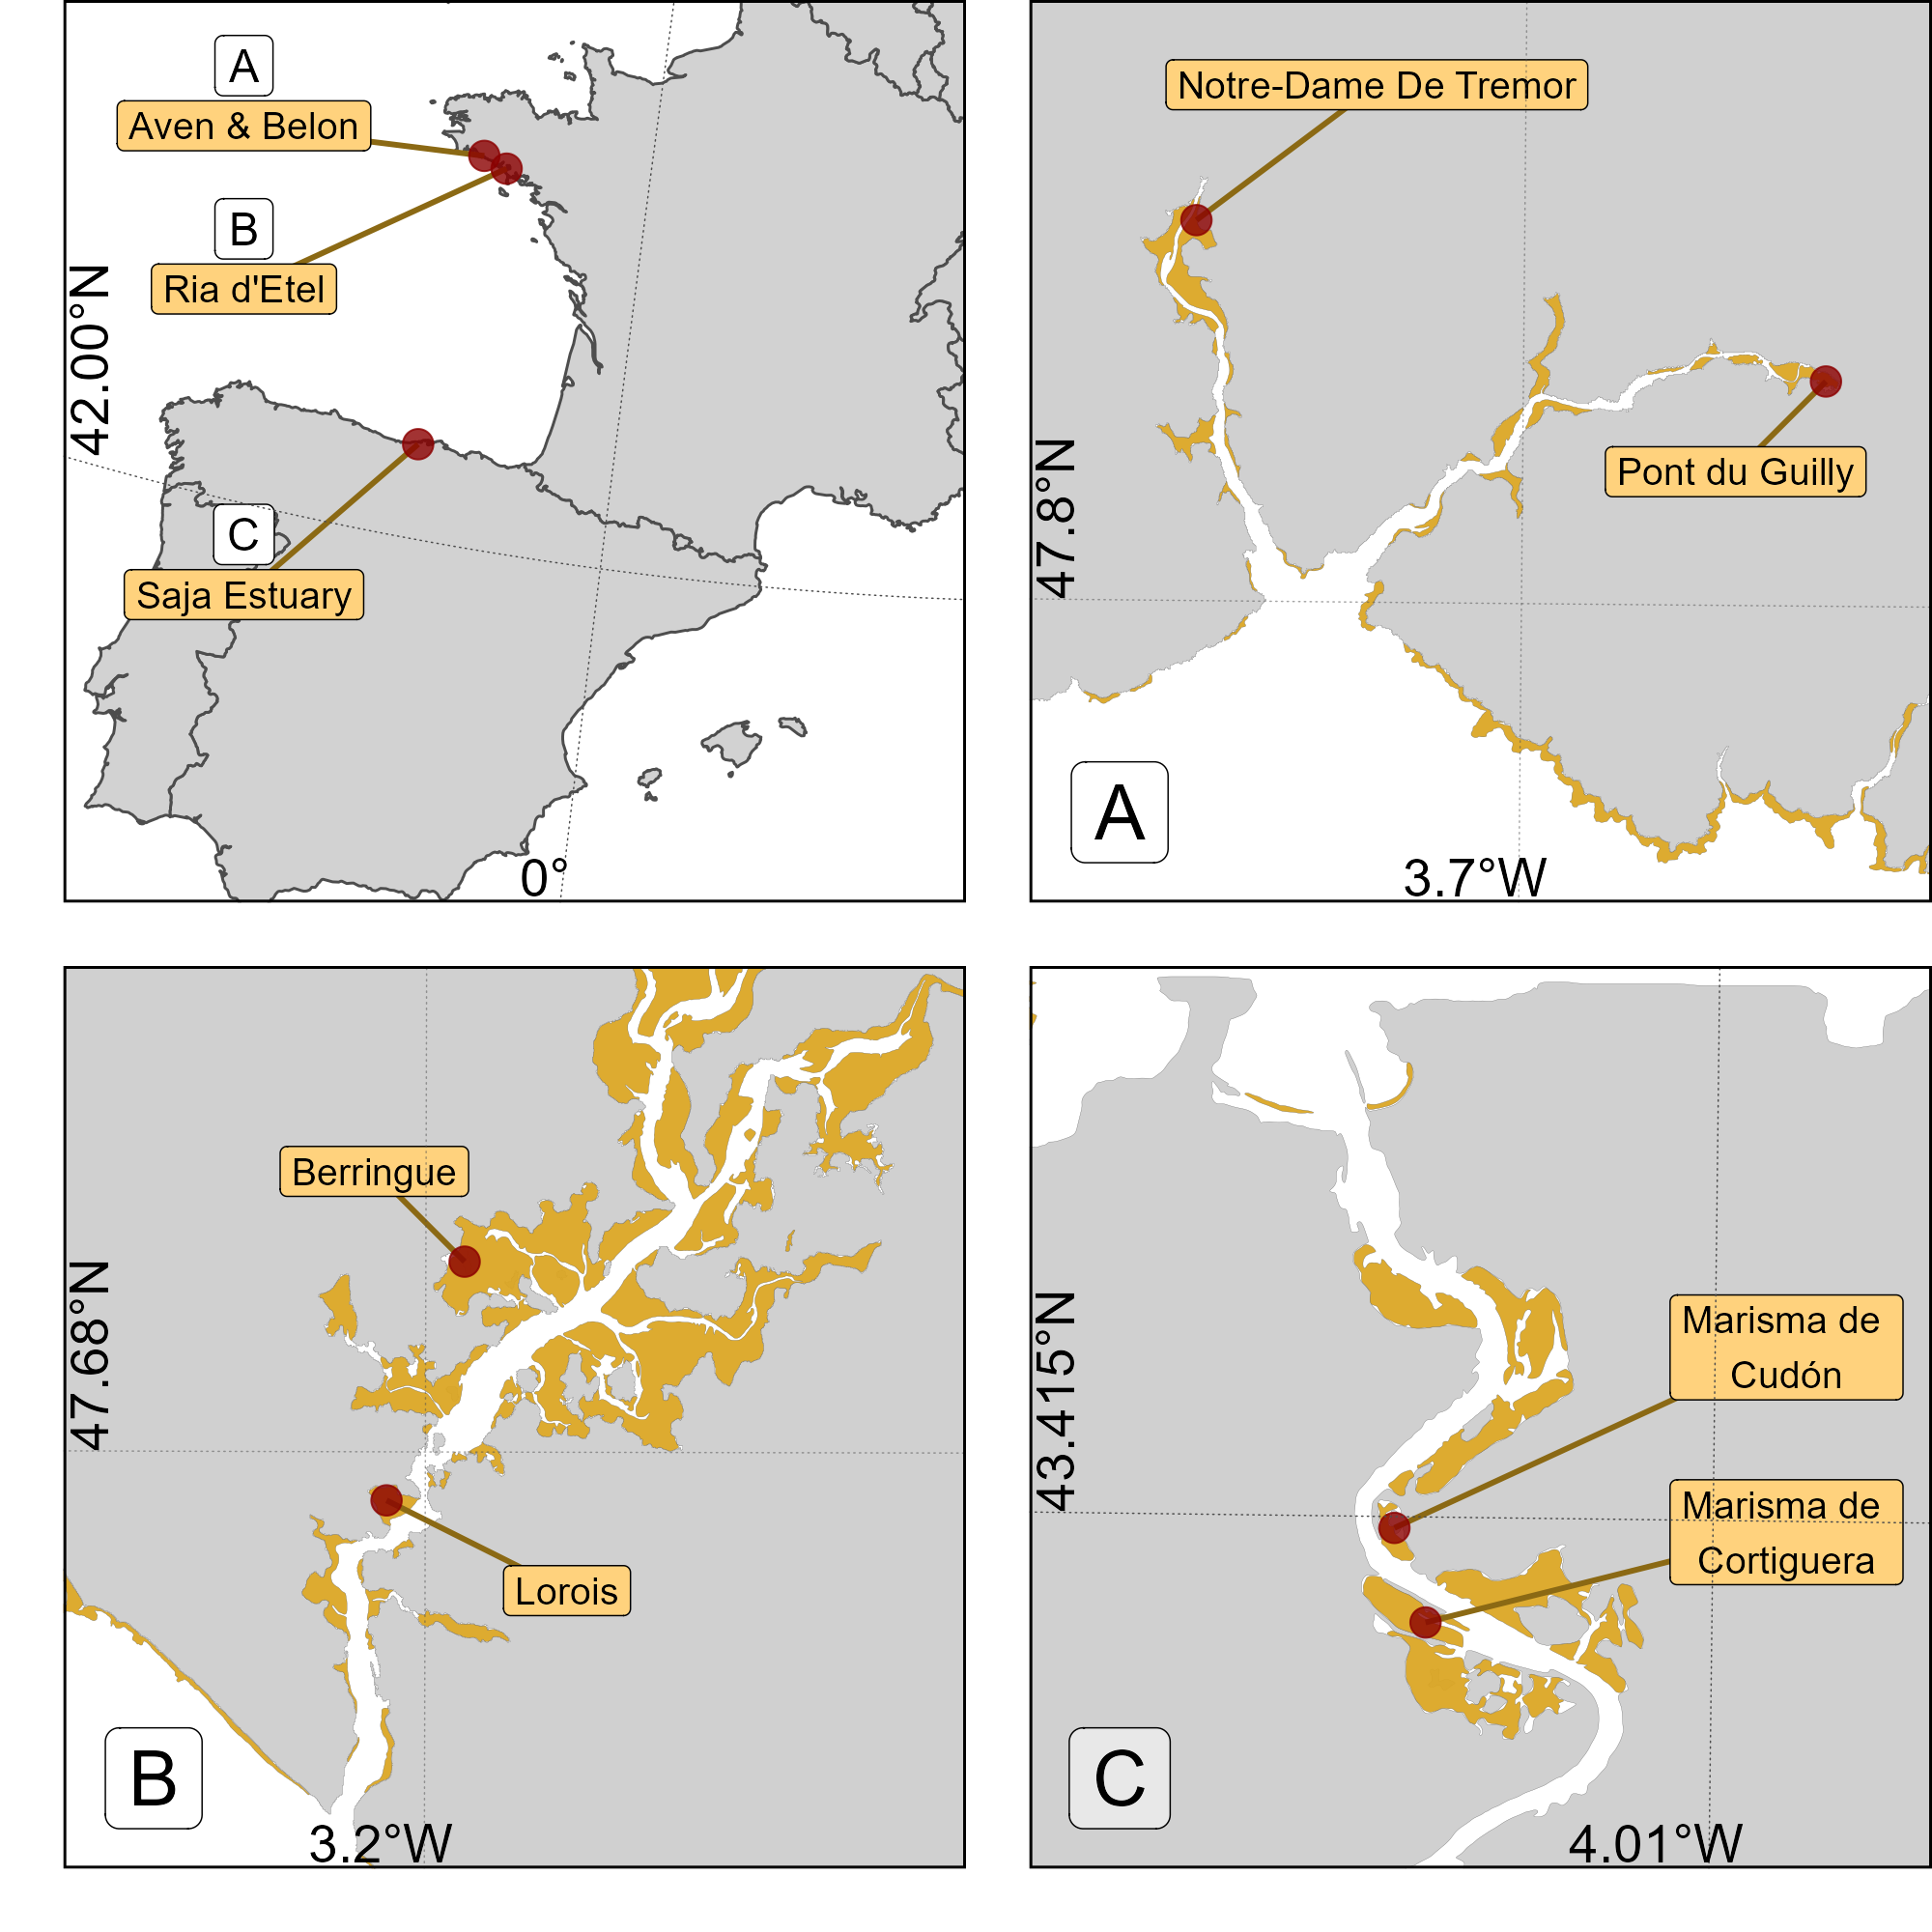

In [ ]:
knitr::include_graphics("Figures/Low_res/Figure1/Map_site.png")

## Study sites

A total of

# Results

# Discussion

# Conclusion

# References